Cargar un audio estéreo de entre los facilitados (no todos que sino el
repositorio pesará mucho) y mostrar sus características: frecuencia de
muestreo, número de canales y tamaño del archivo en Mb.

In [14]:
from scipy.io import wavfile
import IPython
import os
import numpy as np

# Creación de los directorios que usaremos.
cwd = os.getcwd()

audio_input_path = os.path.join(cwd, os.path.join('audio', 'examples'))
audio_output_path = os.path.join(cwd, os.path.join('audio', '_output'))
print(f'Directorio con los audios de entrada: {audio_input_path}')
print(f'Directorio donde guardaremos los audios generados: {audio_output_path}\n')

# Cargamos el archivo de audio -> game_of_thrones.wav
filename = os.path.join(audio_input_path, 'game_of_thrones.wav') 
#Sacamos del archivo la Frecuencia de muestreo (sample_rate) y los datos del audio
sample_rate, audio_data = wavfile.read(filename)

#Mostramos los datos del audio
#  Frecuencia de muestreo
print(f'Frecuencia de muestreo (sample rate): {sample_rate/1000} kHz')
#  Número total de canales
print(f'Número de canales: {audio_data.shape[1]}')
#  Número total de muestras
print(f'Número de muestras: {audio_data.shape[0]}')
#  Tamaño del archivo en MB
file_size_mb = os.path.getsize(filename) / (1024 * 1024)
print(f'Tamaño del archivo: {file_size_mb:.2f} MB')


Directorio con los audios de entrada: c:\Users\MSI\.git\new_repo\Audio\audio\examples
Directorio donde guardaremos los audios generados: c:\Users\MSI\.git\new_repo\Audio\audio\_output

Frecuencia de muestreo (sample rate): 44.1 kHz
Número de canales: 2
Número de muestras: 919907
Tamaño del archivo: 3.51 MB


Incluir un widget para reproducir el audio estéreo.

In [15]:
IPython.display.Audio(audio_data.T, rate=sample_rate)

Convertir el archivo de audio estéreo a mono y mostrar las características
anteriormente mencionadas.

In [ ]:
# Convertimos a mono mediante la media por canal (simplificacion).
new_data_mono = audio_data.mean(axis=1)  

# Características del audio
print('Nuevos datos de audio (mono):')
print(f'- Primeras muestras: {new_data_mono[:5]}...')
# Mantener resolución int16
new_data_mono = new_data_mono.astype(np.int16)

print(f'- Resolución: {new_data_mono.dtype}\n')
#  Frecuencia de muestreo
print(f'Frecuencia de muestreo (sample rate): {sample_rate/1000} kHz')
# Número de canales
print(f'Número de canales: {1}')
# Número de muestras
print(f'Número de muestras: {new_data_mono.shape}')
# Tamaño en memoria (no archivo aún)
size_mb = new_data_mono.nbytes / (1024 * 1024)
print(f'Tamaño en memoria: {size_mb:.2f} MB')


Nuevos datos de audio (mono):
- Primeras muestras: [-12321.5 -12887.5 -13708.5 -14552.5 -14875.5]...
- Resolución: int16

Frecuencia de muestreo (sample rate): 44.1 kHz
Número de canales: 1
Número de muestras: (919907,)
Tamaño en memoria: 1.7545833587646484 MB


Incluir un nuevo widget para reproducir el audio mono.

In [17]:
IPython.display.Audio(new_data_mono, rate=sample_rate)

Mostrar la gráfica en el dominio del tiempo para el audio mono y estéreo.

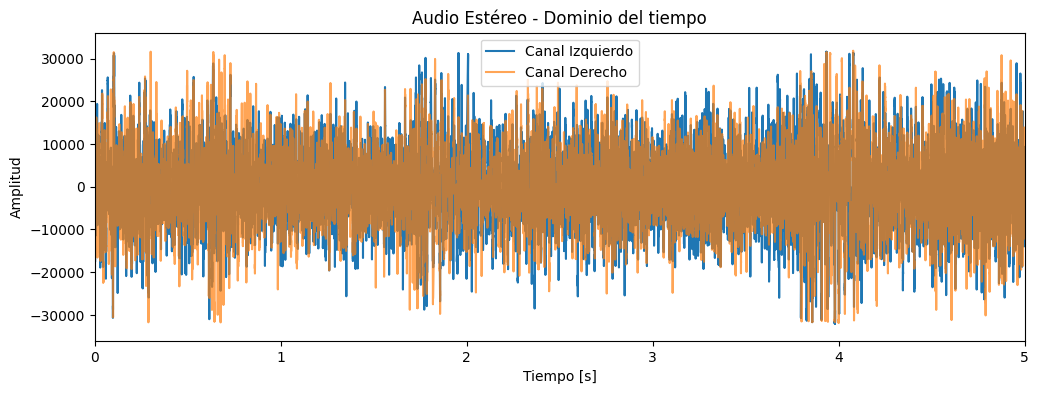

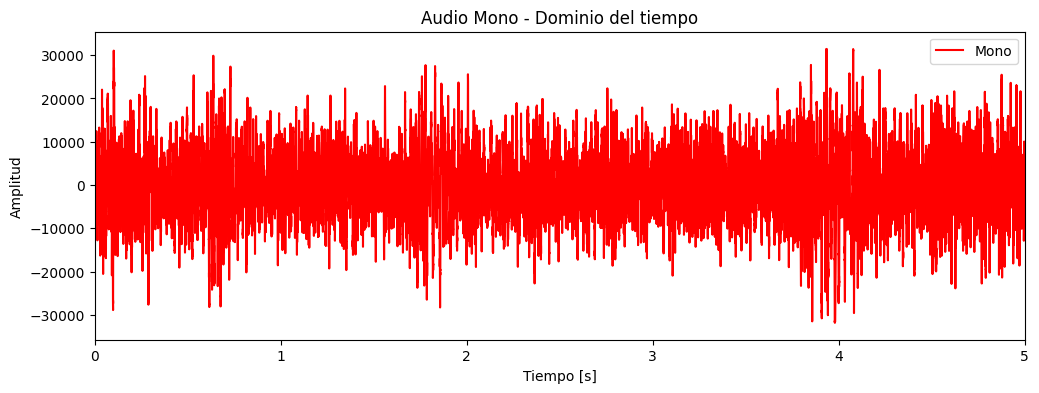

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

t_stereo = np.arange(audio_data.shape[0]) / sample_rate
t_mono   = np.arange(new_data_mono.shape[0]) / sample_rate

# GRÁFICA DEL AUDIO ESTÉREO 
plt.figure(figsize=(12, 4))
plt.plot(t_stereo, audio_data[:, 0], label='Canal Izquierdo')
plt.plot(t_stereo, audio_data[:, 1], label='Canal Derecho', alpha=0.7)
plt.title('Audio Estéreo - Dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.xlim(0, 5)  # mostrar solo los primeros 5 segundos 
plt.show()

#  GRÁFICA DEL AUDIO MONO 
plt.figure(figsize=(12, 4))
plt.plot(t_mono, new_data_mono, color='r', label='Mono')
plt.title('Audio Mono - Dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.xlim(0, 5)  # mostrar solo los primeros 5 segundos
plt.show()

Explicar con tus palabras: diferencia entre audio estéreo y mono.

El sonido mono es un tipo de sonido que se reproduce a través de un solo canal. Esto significa que el sonido es el mismo en ambos oídos mientras que el sonido estéreo, es un tipo de sonido que se reproduce a través de dos canales, uno para el oído izquierdo y otro para el oído derecho.